In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import os
from warnings import filterwarnings
filterwarnings('ignore')

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [8,8]


In [ ]:
#code to unzip the zipped folder
#!unzip '/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/train/train.zip' -d '/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/train'

`The DataSet consists of the X-Ray Images and both the positive and negative X-Ray images are saved in a single folder. Therefore here we don't have a folder structure which differentiates the 2 classes. But there is a .txt file provided which has the details of the filename(image name) with the status and source which will be used for loading the dataset`





In [5]:
#checkign the txt file of the training data
train = pd.read_csv('/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/Text1.txt', sep=" ", header = None)
train.columns = ['SL.NO','FileName','Status','Source']
print('Shape:', train.shape,'\n',train.Status.value_counts())


Shape: (15951, 4) 
 negative    13793
positive     2158
Name: Status, dtype: int64


In [6]:
#checkign the txt file of the testing data
test = pd.read_csv('/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/Test.txt',sep=" ", header = None)
test.columns = ['SL.NO','FileName','Status','Source']
print('Shape:', test.shape,'\n',test.Status.value_counts())

Shape: (400, 4) 
 negative    200
positive    200
Name: Status, dtype: int64




```
Trainging data consists of 15951 X-ray images with 13793 images into positive class and 2158 images into negative class
```



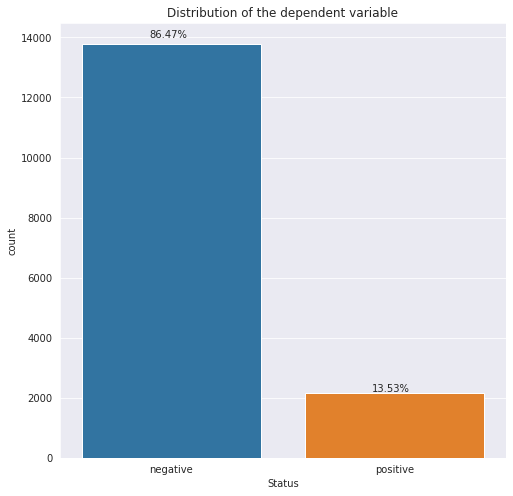

In [5]:
import seaborn as sns
from matplotlib import pyplot
sns.set_style('darkgrid')
sns.countplot(train['Status'])
plt.title('Distribution of the dependent variable')
neg = round(train['Status'].value_counts()['negative'].sum()*100/train['Status'].value_counts().sum(),2)
pos = round(train['Status'].value_counts()['positive'].sum()*100/train['Status'].value_counts().sum(),2)
plt.text(x=-0.1, y=14000,s= str(neg)+'%')
plt.text(x=0.9,y=2200,s = str(pos)+'%')

plt.show()


In [7]:
#we'll not be using the SL.No and the Source columns so they'll be deleted
train.head()
train = train.drop(['SL.NO','Source'],axis=1)
test = test.drop(['SL.NO','Source'],axis=1)

In [8]:
train.head(), test.head()

(                                         FileName    Status
 0                                  ARDSSevere.png  negative
 1  acute-respiratory-distress-syndrome-ards-1.jpg  negative
 2    acute-respiratory-distress-syndrome-ards.jpg  negative
 3          ards-secondary-to-tiger-snake-bite.png  negative
 4                 pneumocystis-pneumonia-2-PA.png  negative,
                                     FileName    Status
 0  MIDRC-RICORD-1C-419639-003251-46647-0.png  positive
 1  MIDRC-RICORD-1C-419639-001464-39871-0.png  positive
 2  MIDRC-RICORD-1C-419639-000918-78965-0.png  positive
 3  MIDRC-RICORD-1C-419639-003318-64285-0.png  positive
 4  MIDRC-RICORD-1C-419639-001015-81591-0.png  positive)



```
In order to read the images from the path we'll be concatenating the 'FileName' column wiht the folder path where the files are located
```



In [9]:
training_imgs_path = '/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/train/'
testing_imgs_path = '/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/test/test.zip (Unzipped Files)/'
train['FileName'] = training_imgs_path + train['FileName']
test['FileName'] = testing_imgs_path + test['FileName']

In [10]:
train.head(), test.head()

(                                            FileName    Status
 0  /content/drive/MyDrive/ML Projects/Covid X-Ray...  negative
 1  /content/drive/MyDrive/ML Projects/Covid X-Ray...  negative
 2  /content/drive/MyDrive/ML Projects/Covid X-Ray...  negative
 3  /content/drive/MyDrive/ML Projects/Covid X-Ray...  negative
 4  /content/drive/MyDrive/ML Projects/Covid X-Ray...  negative,
                                             FileName    Status
 0  /content/drive/MyDrive/ML Projects/Covid X-Ray...  positive
 1  /content/drive/MyDrive/ML Projects/Covid X-Ray...  positive
 2  /content/drive/MyDrive/ML Projects/Covid X-Ray...  positive
 3  /content/drive/MyDrive/ML Projects/Covid X-Ray...  positive
 4  /content/drive/MyDrive/ML Projects/Covid X-Ray...  positive)

In [10]:
train.Status.value_counts()

negative    13793
positive     2158
Name: Status, dtype: int64



```
since the dependent class is imbalanced the majority class will be bringing down to minority class, we'll be applying the undersampling
```



In [11]:
neg1 = train[train.Status.eq('negative')].sample(2158)
pos1 = train[train.Status.eq('positive')].sample(2158)
train_1 = neg1.append(pos1)
train_1.Status.value_counts()

negative    2158
positive    2158
Name: Status, dtype: int64

In [12]:
train_1.head()

,FileName,Status
7584,/content/drive/MyDrive/ML Projects/Covid X-Ray...,negative
10245,/content/drive/MyDrive/ML Projects/Covid X-Ray...,negative
12729,/content/drive/MyDrive/ML Projects/Covid X-Ray...,negative
6320,/content/drive/MyDrive/ML Projects/Covid X-Ray...,negative
15087,/content/drive/MyDrive/ML Projects/Covid X-Ray...,negative


In [13]:
from sklearn.model_selection import train_test_split
X_train1, val1 = train_test_split(train_1,test_size=0.2,stratify = train_1['Status'], random_state=10)


In [14]:
X_train1.shape, val1.shape

((3452, 2), (864, 2))

In [15]:
X_train1

,FileName,Status
608,/content/drive/MyDrive/ML Projects/Covid X-Ray...,positive
14380,/content/drive/MyDrive/ML Projects/Covid X-Ray...,negative
4274,/content/drive/MyDrive/ML Projects/Covid X-Ray...,negative
3203,/content/drive/MyDrive/ML Projects/Covid X-Ray...,negative
14666,/content/drive/MyDrive/ML Projects/Covid X-Ray...,negative
...,...,...
2368,/content/drive/MyDrive/ML Projects/Covid X-Ray...,positive
1545,/content/drive/MyDrive/ML Projects/Covid X-Ray...,positive
10766,/content/drive/MyDrive/ML Projects/Covid X-Ray...,negative
14731,/content/drive/MyDrive/ML Projects/Covid X-Ray...,negative




```
Before creating a NN , we'll try to load one X-Ray image and check its dimension. The images are mostly of shape 1024,1024
```



In [ ]:
from keras.preprocessing import image
imag1 = image.load_img('/content/drive/MyDrive/Covid X-Ray Image Classification/Copy of 47c78742-4998-4878-aec4-37b11b1354ac.png')
img_arr = np.array(imag1)
img_arr.shape

(1024, 1024, 3)

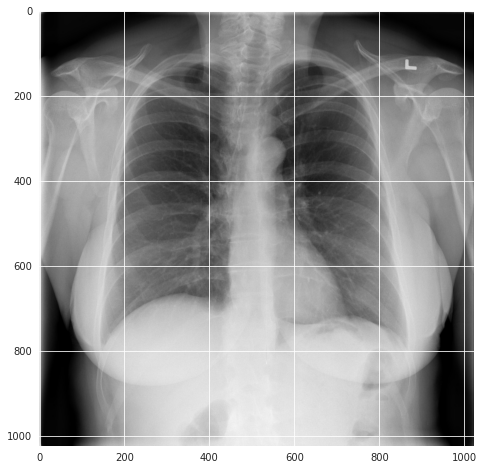

In [ ]:
plt.imshow(img_arr)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train1_gen = ImageDataGenerator(rescale = 1./255,
                                #rotation_range = 30,
                                #shear_range=0.5,
                                #zoom_range=[0.5,0.7],
                                #horizontal_flip=True,
                                #vertical_flip=True
                                )
val1_gen = ImageDataGenerator(rescale = 1./255,
                                #rotation_range = 30,
                                #shear_range=0.5,
                                #zoom_range=[0.5,0.7],
                                #horizontal_flip=True,
                                #vertical_flip=True
                              )

train_set = train1_gen.flow_from_dataframe(
                                           dataframe=X_train1,
                                          directory = '/content/drive/MyDrive/Covid X-Ray Image Classification/train',
                                          x_col = "FileName",
                                          y_col="Status",
                                          batch_size=32,
                                          class_mode = 'binary',
                                          shuffle= True,
                                           target_size = (1024,1024)
                                           #save_to_dir='/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/Generated_images',
                                           #save_format='png'
                                         )

val_set = val1_gen.flow_from_dataframe(
                                     dataframe = val1,
                                     directory = '/content/drive/MyDrive/Covid X-Ray Image Classification/train',
                                          x_col = "FileName",
                                          y_col="Status",
                                          batch_size=32,
                                          class_mode = 'binary',
                                          shuffle= True,
                                         target_size = (1024,1024))


Found 2311 validated image filenames belonging to 2 classes.
Found 572 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
classifier = Sequential()
#layer 1
classifier.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu', input_shape=(1024,1024,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#layer 2
classifier.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(1024,1024,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#layer 3
classifier.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#layer 4
classifier.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))


classifier.add(Flatten())

#Dense Layer
classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))



In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1022, 1022, 16)    448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 511, 511, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 509, 509, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 254, 254, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 64)      1

In [ ]:
classifier.compile(loss='binary_crossentropy', optimizer='rmsprop' ,metrics = 'accuracy')

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#filepath = '/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/best-model-{epoch:02d}.hdf5'

#chk_point = ModelCheckpoint(filepath, monitor='val_loss', mode='min',save_best_only = True, verbose=1)

#Early_stop = EarlyStopping(monitor='val_loss',patience=3,verbose=1)

csvlog = CSVLogger('logs.csv', separator=",", append=False)

call_backs_list = [csvlog]


In [ ]:
history = classifier.fit_generator(train_set,
                                   steps_per_epoch = 2294//32,
                                   #7831//32,
                                   epochs = 20,
                                   validation_data=val_set,
                                   validation_steps = 557//32,
                                   #1990//32,
                                   callbacks=call_backs_list
                                   )

Epoch 1/20
71/71 [==============================] - 1273s 17s/step - loss: 0.8322 - accuracy: 0.6867 - val_loss: 0.4926 - val_accuracy: 0.7776
Epoch 2/20
71/71 [==============================] - 162s 2s/step - loss: 0.4796 - accuracy: 0.7806 - val_loss: 0.4313 - val_accuracy: 0.7721
Epoch 3/20
71/71 [==============================] - 143s 2s/step - loss: 0.4006 - accuracy: 0.8344 - val_loss: 0.3371 - val_accuracy: 0.8529
Epoch 4/20
71/71 [==============================] - 140s 2s/step - loss: 0.3226 - accuracy: 0.8665 - val_loss: 0.2687 - val_accuracy: 0.8805
Epoch 5/20
71/71 [==============================] - 141s 2s/step - loss: 0.5311 - accuracy: 0.9074 - val_loss: 0.2498 - val_accuracy: 0.8952
Epoch 6/20
71/71 [==============================] - 144s 2s/step - loss: 0.2748 - accuracy: 0.9194 - val_loss: 0.2501 - val_accuracy: 0.8879
Epoch 7/20
71/71 [==============================] - 141s 2s/step - loss: 0.1858 - accuracy: 0.9444 - val_loss: 0.2122 - val_accuracy: 0.9099
Epoch 8/20


In [ ]:
test_datagen = ImageDataGenerator(rescale=(1/255))

test_set = test_datagen.flow_from_dataframe(
                                     dataframe = test,
                                     directory = '/content/drive/MyDrive/Covid X-Ray Image Classification/test/test.zip (Unzipped Files)',
                                          x_col = "FileName",
                                          y_col="Status",
                                          batch_size=32,
                                          class_mode = 'binary',
                                          shuffle= True,
                                       target_size = (1024,1024))

Found 400 validated image filenames belonging to 2 classes.


In [ ]:
eval = classifier.evaluate_generator(generator=test_set)

In [28]:
score = pd.DataFrame(columns=['Model','val_loss','val_accuracy'])
def update_score(model,val_loss,val_accuracy):
  global score

  score=score.append({
                   'Model':model,
                   'val_loss':val_loss,
                   'val_accuracy':val_accuracy
                   
  }, ignore_index=True)

In [ ]:
update_score('CNN1',eval[0],eval[1])

In [ ]:
score

,Model,val_loss,val_accuracy
0,CNN1,1.220242,0.87


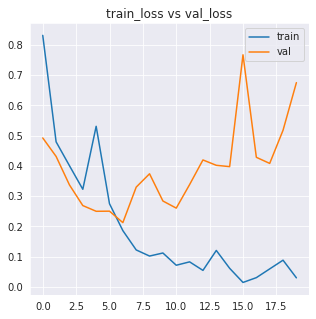

In [ ]:
cnn1_log = pd.read_csv('/content/logs.csv')
plt.figure(figsize=(5,5))
plt.title('train_loss vs val_loss')
plt.plot(cnn1_log.loss,label='train')
plt.plot(cnn1_log.val_loss,label='val')
plt.legend()
plt.show()

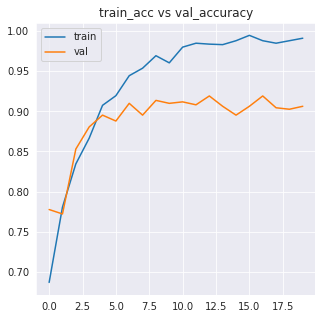

In [ ]:
plt.figure(figsize=(5,5))
plt.title('train_acc vs val_accuracy')
plt.plot(cnn1_log.accuracy,label='train')
plt.plot(cnn1_log.val_accuracy,label='val')
plt.legend()
plt.show()

<h3><font color='red'> MobileNet</font></h3>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train2_gen = ImageDataGenerator(rescale=1.0/255)
val2_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train1_set = train2_gen.flow_from_dataframe(
                                           dataframe=X_train1,
                                          directory = '/content/drive/MyDrive/Covid X-Ray Image Classification/train',
                                          x_col = "FileName",
                                          y_col="Status",
                                          batch_size=10,
                                          class_mode = 'binary',
                                          shuffle= True,
                                           target_size = (100,100)
                                           #save_to_dir='/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/Generated_images',
                                           #save_format='png'
                                         )

val1_set = val2_gen.flow_from_dataframe(
                                     dataframe = val1,
                                     directory = '/content/drive/MyDrive/Covid X-Ray Image Classification/train',
                                          x_col = "FileName",
                                          y_col="Status",
                                          batch_size=10,
                                          class_mode = 'binary',
                                          shuffle= True,
                                         target_size = (100,100))

Found 2311 validated image filenames belonging to 2 classes.
Found 572 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNet
base_model2 = MobileNet(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='max')

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
from keras.layers import Dense, Dropout,Flatten
from tensorflow.keras import Model
x_2 = base_model2.output
x_2 = Flatten()(x_2)
x_2 = Dense(1024,activation='relu')(x_2)
x_2 = Dropout(0.5)(x_2)

predictions_2 = Dense(1,activation = "sigmoid")(x_2)
model_final_2 = Model(base_model2.input,predictions_2)

In [ ]:
model_final_2.compile('rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
csvlog1 = CSVLogger('logs1.csv', separator=",", append=False)

In [ ]:
eff_history_1 = model_final_2.fit_generator(train1_set, validation_data = val1_set, steps_per_epoch = 108, epochs =40, callbacks=csvlog1)

Epoch 1/40
108/108 [==============================] - 46s 366ms/step - loss: 2.2880 - accuracy: 0.7554 - val_loss: 1.6418 - val_accuracy: 0.5927
Epoch 2/40
108/108 [==============================] - 41s 382ms/step - loss: 0.7323 - accuracy: 0.8343 - val_loss: 0.4656 - val_accuracy: 0.7972
Epoch 3/40
108/108 [==============================] - 41s 383ms/step - loss: 0.5161 - accuracy: 0.8491 - val_loss: 1.6246 - val_accuracy: 0.8724
Epoch 4/40
108/108 [==============================] - 41s 385ms/step - loss: 0.5786 - accuracy: 0.8380 - val_loss: 2.4321 - val_accuracy: 0.6626
Epoch 5/40
108/108 [==============================] - 43s 396ms/step - loss: 0.8018 - accuracy: 0.8454 - val_loss: 0.5609 - val_accuracy: 0.8969
Epoch 6/40
108/108 [==============================] - 43s 403ms/step - loss: 0.5213 - accuracy: 0.8646 - val_loss: 0.7696 - val_accuracy: 0.7902
Epoch 7/40
108/108 [==============================] - 43s 398ms/step - loss: 0.3550 - accuracy: 0.8935 - val_loss: 0.4779 - val_ac

In [ ]:
test_datagen = ImageDataGenerator(rescale=(1/255))

test_set = test_datagen.flow_from_dataframe(
                                     dataframe = test,
                                     directory = '/content/drive/MyDrive/Covid X-Ray Image Classification/test/test.zip (Unzipped Files)',
                                          x_col = "FileName",
                                          y_col="Status",
                                          batch_size=32,
                                          class_mode = 'binary',
                                          shuffle= True,
                                       target_size = (100,100))

Found 400 validated image filenames belonging to 2 classes.


In [ ]:
eval1 = model_final_2.evaluate_generator(generator=test_set)

In [ ]:
update_score('MobileNet',eval1[0],eval1[1])

In [ ]:
score

,Model,val_loss,val_accuracy
0,CNN1,1.220242,0.8700
1,MobileNet,1.582924,0.7875


In [ ]:
cnn1_log = pd.read_csv('/content/logs1.csv')
#cnn1_log

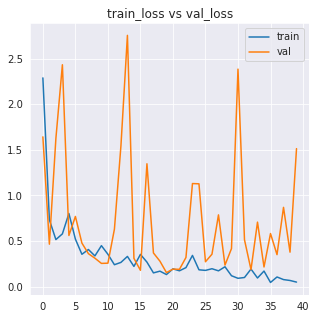

In [ ]:
plt.figure(figsize=(5,5))
plt.title('train_loss vs val_loss')
plt.plot(cnn1_log.loss,label='train')
plt.plot(cnn1_log.val_loss,label='val')
plt.legend()
plt.show()


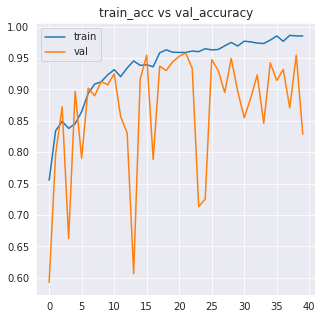

In [ ]:
plt.figure(figsize=(5,5))
plt.title('train_acc vs val_accuracy')
plt.plot(cnn1_log.accuracy,label='train')
plt.plot(cnn1_log.val_accuracy,label='val')
plt.legend()
plt.show()

<font color='blue'> Implementing Multiple Pooling </font>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train2_gen = ImageDataGenerator(rescale=1.0/255)
val2_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train1_set = train2_gen.flow_from_dataframe(
                                           dataframe=X_train1,
                                          directory = '/content/drive/MyDrive/Covid X-Ray Image Classification/train',
                                          x_col = "FileName",
                                          y_col="Status",
                                          batch_size=10,
                                          class_mode = 'binary',
                                          shuffle= True,
                                           target_size = (1024,1024)
                                           #save_to_dir='/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/Generated_images',
                                           #save_format='png'
                                         )

val1_set = val2_gen.flow_from_dataframe(
                                     dataframe = val1,
                                     directory = '/content/drive/MyDrive/Covid X-Ray Image Classification/train',
                                          x_col = "FileName",
                                          y_col="Status",
                                          batch_size=10,
                                          class_mode = 'binary',
                                          shuffle= True,
                                         target_size = (1024,1024))

Found 2311 validated image filenames belonging to 2 classes.
Found 572 validated image filenames belonging to 2 classes.


In [ ]:
from keras.layers import Input, Conv1D, MaxPooling2D, Flatten
from tensorflow.keras import Model
import tensorflow as tf

#x=Sequential()
x=Input(shape=(1024,1024,3))

conv = Conv1D(filters=16,kernel_size=4,activation='linear', padding='valid')(x)
#left operation
max_statistic = MaxPooling2D(pool_size =4 ,padding ='valid')(conv)

#right operation
range_statistic = tf.math.negative(conv)

range_statistic = MaxPooling2D(pool_size=4, padding='valid')(range_statistic)

range_statistic = tf.math.negative(range_statistic)

range_statistic = tf.math.subtract(max_statistic,range_statistic)

concatte = tf.keras.layers.Concatenate()([max_statistic,range_statistic])
features = Flatten()(concatte)

features = tf.keras.layers.ReLU()(features)

dense = Dense(units=32,activation='relu')(features)
predictions = Dense(units=1,activation='sigmoid',name='output')(dense)

model = Model(inputs=x, outputs = predictions)
tf.keras.utils.plot_model(model,show_shapes=False,dpi=600)

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
#'model-{epoch:03d}-{val_loss:03f}-{val_accuracy:03f}.h5', save_best_only='True',monitor = 'val_loss', mode='min'
mod = ModelCheckpoint('model-{epoch:03d}-{val_loss:03f}-{val_accuracy:03f}.h5', save_best_only='True',monitor='val_loss',mode='min')
csvlog = CSVLogger('logs2.csv', separator=",", append=False)
cll_bck = [mod,csvlog]

In [ ]:
pool_history = model.fit(train1_set, validation_data = val1_set, steps_per_epoch = 108, epochs =60, callbacks=cll_bck)

Epoch 1/60
108/108 [==============================] - 82s 749ms/step - loss: 7.9660 - accuracy: 0.7500 - val_loss: 1.0031 - val_accuracy: 0.8689
Epoch 2/60
108/108 [==============================] - 80s 739ms/step - loss: 0.4228 - accuracy: 0.9346 - val_loss: 1.0318 - val_accuracy: 0.8514
Epoch 3/60
108/108 [==============================] - 80s 738ms/step - loss: 0.3320 - accuracy: 0.9519 - val_loss: 0.2492 - val_accuracy: 0.9633
Epoch 4/60
108/108 [==============================] - 79s 729ms/step - loss: 0.1162 - accuracy: 0.9757 - val_loss: 0.2234 - val_accuracy: 0.9598
Epoch 5/60
108/108 [==============================] - 79s 732ms/step - loss: 0.0900 - accuracy: 0.9757 - val_loss: 0.2233 - val_accuracy: 0.9580
Epoch 6/60
108/108 [==============================] - 79s 727ms/step - loss: 0.1818 - accuracy: 0.9685 - val_loss: 0.5992 - val_accuracy: 0.8829
Epoch 7/60
108/108 [==============================] - 79s 730ms/step - loss: 0.1768 - accuracy: 0.9617 - val_loss: 0.1595 - val_ac

In [ ]:
test_datagen = ImageDataGenerator(rescale=(1/255))

test_set = test_datagen.flow_from_dataframe(
                                     dataframe = test,
                                     directory = '/content/drive/MyDrive/Covid X-Ray Image Classification/test/test.zip (Unzipped Files)',
                                          x_col = "FileName",
                                          y_col="Status",
                                          batch_size=32,
                                          class_mode = 'binary',
                                          shuffle= True,
                                       target_size = (1024,1024))

Found 400 validated image filenames belonging to 2 classes.


In [ ]:
from keras.models import load_model
model = load_model('/content/model-012-0.158821-0.970280.h5')

In [ ]:
eval2 = model.evaluate_generator(generator=test_set)

In [ ]:
update_score('CNN2-MultiplePooling',eval2[0],eval2[1])

In [ ]:
score

,Model,val_loss,val_accuracy
0,CNN1,1.220242,0.8700
1,MobileNet,1.582924,0.7875
2,CNN2-MultiplePooling,0.077369,0.9825


In [ ]:
cnn1_log = pd.read_csv('/content/logs2.csv')
#cnn1_log

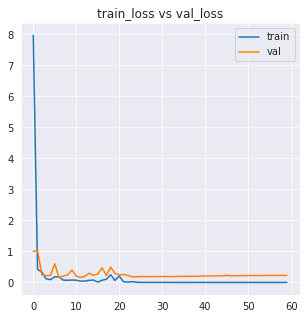

In [ ]:
plt.figure(figsize=(5,5))
plt.title('train_loss vs val_loss')
plt.plot(cnn1_log.loss,label='train')
plt.plot(cnn1_log.val_loss,label='val')
plt.legend()
plt.show()


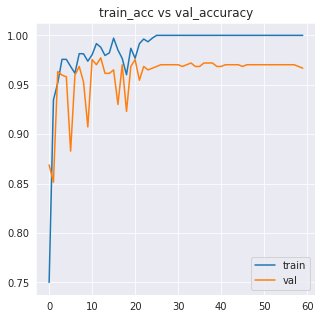

In [ ]:
plt.figure(figsize=(5,5))
plt.title('train_acc vs val_accuracy')
plt.plot(cnn1_log.accuracy,label='train')
plt.plot(cnn1_log.val_accuracy,label='val')
plt.legend()
plt.show()

<font color='blue'> VGG16</font>

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train2_gen = ImageDataGenerator(rescale=1.0/255)
val2_gen = ImageDataGenerator(rescale=1/255)

train1_set = train2_gen.flow_from_dataframe(
                                           dataframe=X_train1,
                                          directory = '/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/train',
                                          x_col = "FileName",
                                          y_col="Status",
                                          batch_size=12,
                                          class_mode = 'binary',
                                          shuffle= True,
                                           target_size = (500,500)
                                           #save_to_dir='/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/Generated_images',
                                           #save_format='png'
                                         )

val1_set = val2_gen.flow_from_dataframe(
                                     dataframe = val1,
                                     directory = '/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/train',
                                          x_col = "FileName",
                                          y_col="Status",
                                          batch_size=12,
                                          class_mode = 'binary',
                                          shuffle= True,
                                         target_size = (500,500))

Found 2277 validated image filenames belonging to 2 classes.
Found 569 validated image filenames belonging to 2 classes.


In [17]:
from keras.applications.vgg16 import VGG16
vgg_model = VGG16(input_shape=(500,500,3),include_top=False,weights='imagenet',pooling='max')
for layer in vgg_model.layers:
    layer.trainable=False

In [18]:
from keras.layers import Dense, Dropout,Flatten
from tensorflow.keras import Model
x_2 = vgg_model.output

predictions_2 = Dense(1,activation = "sigmoid")(x_2)
vgg_model2= Model(vgg_model.input,predictions_2)
# for layer in vgg_model2.layers:
#     layer.trainable=False

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
#'model-{epoch:03d}-{val_loss:03f}-{val_accuracy:03f}.h5', save_best_only='True',monitor = 'val_loss', mode='min'
#mod = ModelCheckpoint('model-{epoch:03d}-{val_loss:03f}-{val_accuracy:03f}.h5', save_best_only='True',monitor='val_loss',mode='min')
csvlog = CSVLogger('logs3.csv', separator=",", append=False)
cll_bck = [csvlog]

In [20]:
vgg_model2.compile('rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
vgg_history = vgg_model2.fit_generator(train1_set, validation_data = val1_set, steps_per_epoch = 100, epochs =20, callbacks=cll_bck)

Epoch 1/20
100/100 [==============================] - 322s 3s/step - loss: 0.5956 - accuracy: 0.7076 - val_loss: 0.5551 - val_accuracy: 0.7750
Epoch 2/20
100/100 [==============================] - 136s 1s/step - loss: 0.5067 - accuracy: 0.7942 - val_loss: 0.5147 - val_accuracy: 0.7733
Epoch 3/20
100/100 [==============================] - 113s 1s/step - loss: 0.4495 - accuracy: 0.8375 - val_loss: 0.4429 - val_accuracy: 0.8506
Epoch 4/20
100/100 [==============================] - 101s 1s/step - loss: 0.4037 - accuracy: 0.8613 - val_loss: 0.4127 - val_accuracy: 0.8453
Epoch 5/20
100/100 [==============================] - 97s 959ms/step - loss: 0.3697 - accuracy: 0.8789 - val_loss: 0.3852 - val_accuracy: 0.8752
Epoch 6/20
100/100 [==============================] - 93s 929ms/step - loss: 0.3451 - accuracy: 0.8800 - val_loss: 0.3630 - val_accuracy: 0.8787
Epoch 7/20
100/100 [==============================] - 92s 922ms/step - loss: 0.3156 - accuracy: 0.8897 - val_loss: 0.3534 - val_accuracy: 

In [22]:
test_datagen = ImageDataGenerator(rescale=(1/255))

test_set = test_datagen.flow_from_dataframe(
                                     dataframe = test,
                                     directory = '/content/drive/MyDrive/ML Projects/Covid X-Ray Image Classification/test/test.zip (Unzipped Files)',
                                          x_col = "FileName",
                                          y_col="Status",
                                          batch_size=32,
                                          class_mode = 'binary',
                                          shuffle= True,
                                       target_size = (500,500))

Found 400 validated image filenames belonging to 2 classes.


In [23]:
eval3 = vgg_model2.evaluate_generator(generator=test_set)

In [24]:
eval3

[0.34371671080589294, 0.8500000238418579]

In [29]:
update_score('VGG16',eval3[0],eval3[1])

In [30]:
score

,Model,val_loss,val_accuracy
0,VGG16,0.343717,0.85


In [25]:
cnn1_log = pd.read_csv('/content/logs3.csv')
#cnn1_log

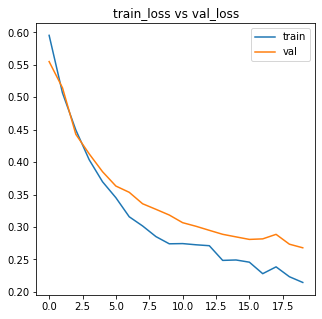

In [26]:
plt.figure(figsize=(5,5))
plt.title('train_loss vs val_loss')
plt.plot(cnn1_log.loss,label='train')
plt.plot(cnn1_log.val_loss,label='val')
plt.legend()
plt.show()


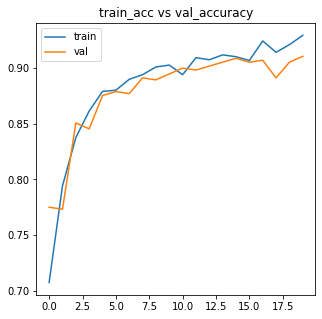

In [27]:
plt.figure(figsize=(5,5))
plt.title('train_acc vs val_accuracy')
plt.plot(cnn1_log.accuracy,label='train')
plt.plot(cnn1_log.val_accuracy,label='val')
plt.legend()
plt.show()